In [14]:
#Importamos las librerías que vamos a utilizar

import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import glob
from sklearn.linear_model import LinearRegression
import math as mt
import statistics as st

In [15]:
#Importamos los documentos que vamos a utilizar 
files = glob.glob("D:/ProgramasJupyter/HIGI/PrediccionPropia/*.csv")

In [16]:
#Vamos a importar las filas y columnas que nos interesan 
mun_t = []
causa_t = []
mes_t=[]
for i in range(0,len(files)):
    data = pd.read_csv(files[i], usecols=[0,1,10,18])
    #El ==11 corresponde a Gto pero se puede tomar el código de cualquier edo
    estado = data[data['ent_regis']==11]
    #El ==20 corresponde a León pero se puede tomar el código de cualquier mpo
    mpo = estado[estado['mun_regis']==20]
    #Obtenemos la causa de muerte en León
    causa = list(mpo['causa_def'])
    #Creamos una lista de las causas de muerte en León por año 
    causa_t.append(causa)

In [17]:
#Aquí convertiremos la lista de defunciones en León en un array
causa_a = np.asarray(causa_t, dtype=object )
#Queremos saber cuántos leoneses fallecieron a lo largo de los años 
total_leon = []
for i in range(0,5):
    total_leon.append(len(causa_t[i]))

print(total_leon)
totals=np.asarray(total_leon)
print(totals.sum())

[8047, 8269, 8814, 9361, 9417]
43908


In [18]:
#En esta sección contabilizamos las veces que una causa de muerte se repitió 
#Infarto Agudo al Miocardio 
imoda=[]
for i in range(5):
    imoda.append(causa_t[i].count('I219'))
print(imoda)

#Síndrome de Dressler
dmoda=[]
for i in range(5):
    dmoda.append(causa_t[i].count('I241'))
print(dmoda)

#Diabetes sin especificar
mmoda=[]
for i in range(5):
    mmoda.append(causa_t[i].count('E119'))
print(mmoda)

[540, 661, 864, 824, 795]
[0, 0, 0, 0, 0]
[511, 501, 577, 606, 59]


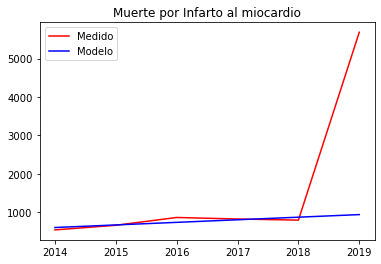

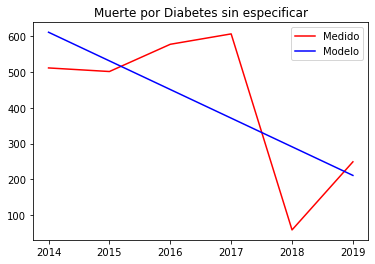

In [28]:
#Aquí se genera la regresión lineal 
años = ['2014','2015','2016','2017','2018','2019']

#Infarto agudo al miocardio
xi = np.linspace(1,5,5).reshape(-1,1)
lri = LinearRegression()
lri.fit(xi,imoda)
mi = lri.coef_[0]
bi = lri.intercept_
xi_p = list(lri.predict(np.array(6).reshape(1,-1)))

fi = lambda x: mi*x+bi
iimoda = imoda+[5686]
xii = np.linspace(1,6,6)
plt.plot(xii,iimoda, color = 'red', label = 'Medido')
plt.plot(xii,fi(xii), color = 'blue', label = 'Modelo')
plt.title('Muerte por Infarto al miocardio')
plt.xticks(xii,años)
plt.legend()
plt.savefig("Infarto.png")
plt.show()

#Diabetes
xm = np.linspace(1,5,5).reshape(-1,1)
lrm = LinearRegression()
lrm.fit(xm,mmoda)
mm = lrm.coef_[0]
bm = lrm.intercept_
xm_p = list(lrm.predict(np.array(6).reshape(1,-1)))
fm = lambda x: mm*x+bm
mmmoda = mmoda+[249]
xmm = np.linspace(1,6,6)
plt.plot(xmm,mmmoda, color = 'red', label = 'Medido')
plt.plot(xmm,fm(xmm), color = 'blue', label = 'Modelo')
plt.title('Muerte por Diabetes sin especificar')
plt.xticks(xmm,años)
plt.legend()
plt.savefig("Diabetes.png")
plt.show()

In [20]:
muerte = []
for i in range(0,5):
    dataa = pd.read_csv(files[i], usecols=[0,1,10,18])
    muerte.append(len(dataa['causa_def']))

[747740.2999999999]


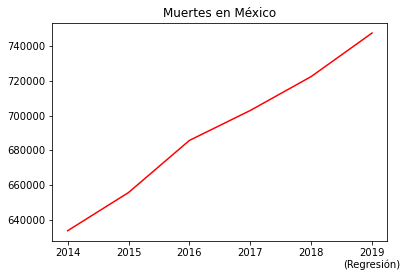

In [24]:
x = np.linspace(1,5,5).reshape(-1,1)    
lrm = LinearRegression()
lrm.fit(x,muerte)
p = lrm.predict(np.array(6.0).reshape(1,-1))
p = list(p)
print(p)
x1 = np.linspace(1,6,6)
m1 = muerte + p
años1 = ['2014','2015','2016','2017','2018','2019\n(Regresión)']
plt.plot(x1, m1, color='red')
plt.title('Muertes en México')
plt.xticks(x1,años1)
plt.savefig("ModeloMuertes.png")
plt.show()
